In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
x

array([[  7.32372609,  -5.30941993],
       [  0.40035872,   7.53746425],
       [ -8.52507277,   4.83792373],
       ...,
       [  6.10993939,  -6.18911766],
       [  6.91433692,  -8.7860239 ],
       [-11.08402983,   7.1407595 ]], shape=(1000, 2))

In [5]:
y

array([2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2,

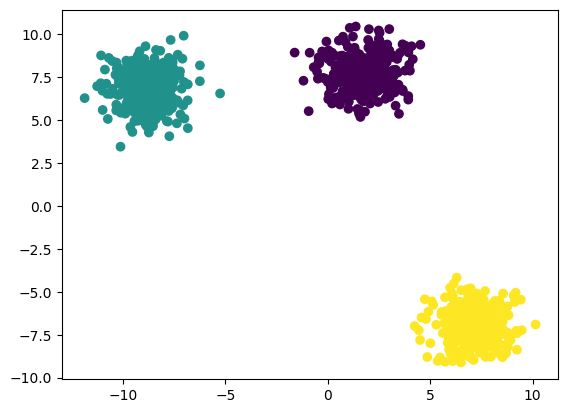

In [6]:
plt.scatter(x[:,0],x[:,1],c=y)

In [7]:
## Standardization = feature scaling technique

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [9]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [10]:
from sklearn.cluster import KMeans

### Elbow Method to select K-Value

In [12]:
wcss = [] 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1599.999999999999,
 374.43159509540726,
 36.51038061939135,
 32.584996818563525,
 29.72672446714481,
 24.995248776382237,
 23.75870108570987,
 18.843966534455788,
 16.196770346524545,
 15.249556434677055]

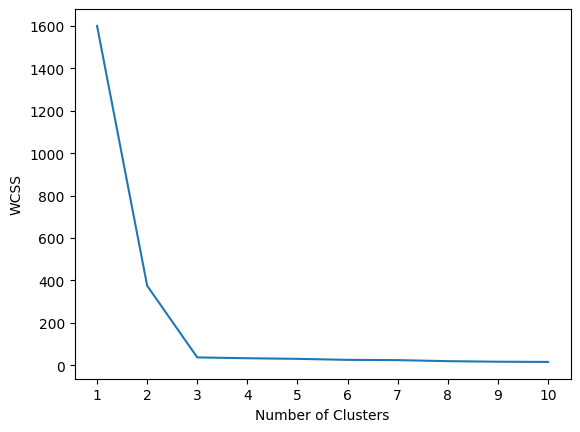

In [14]:
## plot the ELBOW Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
model = KMeans(n_clusters=3,init="k-means++")

In [16]:
model.fit(x_train_scaled)

KMeans(n_clusters=3)

In [18]:
y_pred = model.predict(x_test_scaled)

In [19]:
y_pred

array([1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0,
       0, 0], dtype=int32)

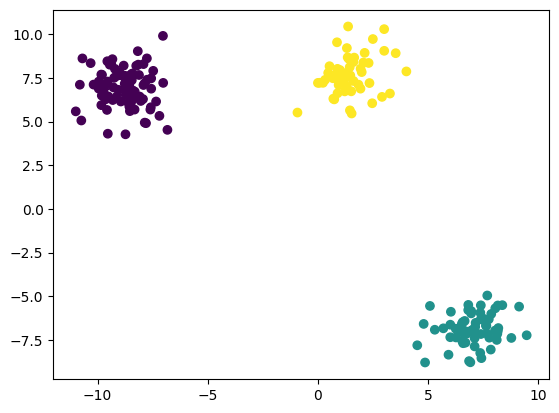

In [22]:
plt.scatter(x_test[:,0],x_test[:,1],c= y_pred)

### Validating k-value diff Method
## 1)kneelocator
## 2)sillhoutee Scoring

In [23]:
## Knee locator
!pip install kneed


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [25]:
kl.elbow

np.int64(3)

In [26]:
# sillhoutee Scoring
from sklearn.metrics import silhouette_score

In [27]:
sillhoute_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeans.labels_)
    sillhoute_coef.append(score)

In [28]:
sillhoute_coef

[np.float64(0.7325297774273403),
 np.float64(0.849317848388328),
 np.float64(0.6585644837355489),
 np.float64(0.47178746716104064),
 np.float64(0.5025566586671933),
 np.float64(0.4714269692873121),
 np.float64(0.3122905792332367),
 np.float64(0.35151750005698795),
 np.float64(0.3266088108889801)]

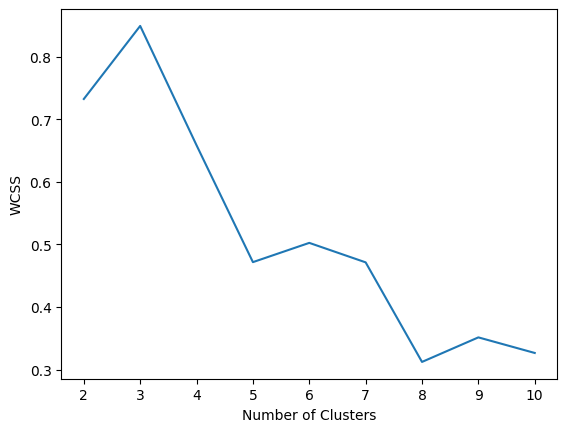

In [30]:
## plot the ELBOW Curve
plt.plot(range(2,11),sillhoute_coef)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()           ## choose the max value in graph